## 머신러닝
# 정규화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 유방암 데이터

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

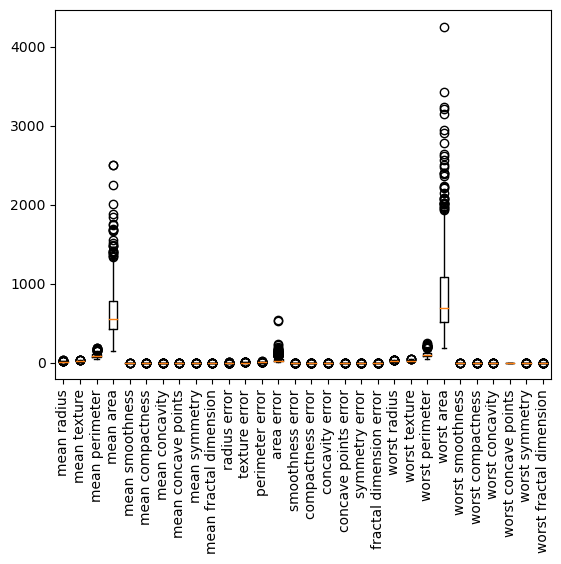

In [4]:
plt.boxplot(cancer.data)
plt.xticks(range(1,31), cancer.feature_names, rotation=90)
pass

### 모든 속성을 다 사용하여 SVC 적용

In [5]:
from sklearn.svm import SVC

In [6]:
X = cancer.data # 속성이 30개
y = cancer.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [9]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [10]:
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9061032863849765 0.965034965034965


### 정규화 적용
- 정규화는 옵션이 아니라 필수이다
- 머신러닝에서 결과가 이상할 때, 가장 큰 실수는 정규화 미적용에서 발생한다

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [13]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s

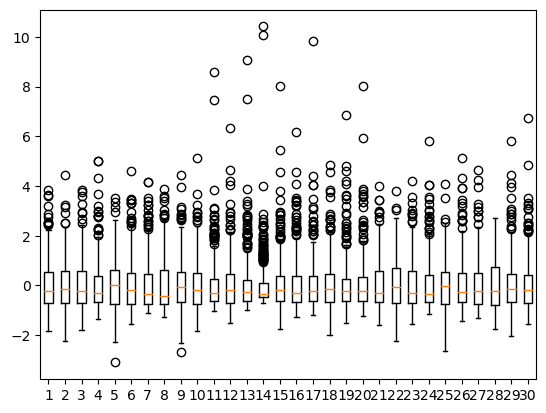

In [14]:
plt.boxplot(X_train_norm); pass

In [15]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [16]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s

In [17]:
model = SVC()
model.fit(X_train_norm, y_train)

SVC()

In [18]:
train_score = model.score(X_train_norm, y_train)
test_score  = model.score(X_test_norm, y_test)
print(train_score, test_score)

0.9882629107981221 0.972027972027972


### 결과 심층분석
- 맞은 샘플은 왜 맞았으며, 틀린 샘플은 왜 틀린 것일까?

In [22]:
y_pred = model.predict(X_test_norm)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [23]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [24]:
(y_test==y_pred).mean()

0.986013986013986

In [25]:
(y_test!=y_pred).sum()

2

In [26]:
y_test[y_test!=y_pred]

array([0, 0])

In [27]:
y_pred[y_test!=y_pred]

array([1, 1])

In [28]:
np.where(y_test!=y_pred)

(array([18, 83], dtype=int64),)

In [29]:
X_test[[18,83]]

array([[1.505e+01, 1.907e+01, 9.726e+01, 7.019e+02, 9.215e-02, 8.597e-02,
        7.486e-02, 4.335e-02, 1.561e-01, 5.915e-02, 3.860e-01, 1.198e+00,
        2.630e+00, 3.849e+01, 4.952e-03, 1.630e-02, 2.967e-02, 9.423e-03,
        1.152e-02, 1.718e-03, 1.758e+01, 2.806e+01, 1.138e+02, 9.670e+02,
        1.246e-01, 2.101e-01, 2.866e-01, 1.120e-01, 2.282e-01, 6.954e-02],
       [1.561e+01, 1.938e+01, 1.000e+02, 7.586e+02, 7.840e-02, 5.616e-02,
        4.209e-02, 2.847e-02, 1.547e-01, 5.443e-02, 2.298e-01, 9.988e-01,
        1.534e+00, 2.218e+01, 2.826e-03, 9.105e-03, 1.311e-02, 5.174e-03,
        1.013e-02, 1.345e-03, 1.791e+01, 3.167e+01, 1.159e+02, 9.886e+02,
        1.084e-01, 1.807e-01, 2.260e-01, 8.568e-02, 2.683e-01, 6.829e-02]])